In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print('GPU Available: ', len(gpu_device))
tf.config.experimental.set_memory_growth(gpu_device[0], True)

GPU Available:  1


## We will use a simple Vaccine Side effect problem on 5000+ random samples to see side effect or no side effect.

A vaccine is tested on 5250 people:
- Age between 10 to 90.
- The individuals split between two groups i.e. one between 10 to 50 and second 51 to 90
- 95% in group 1 had no side effects
- 95% in group2 had side effects
473/473 - 2s - loss: 0.2277 - accuracy: 0.9481 - val_loss: 0.1818 - val_accuracy: 0.9543
Epoch 9/15
473/473 - 2s - loss: 0.2277 - accuracy: 0.9507 - val_loss: 0.1812 - val_accuracy: 0.9619
Epoch 10/15
473/473 - 2s - loss: 0.2272 - accuracy: 0.9513 - val_loss: 0.1810 - val_accuracy: 0.9619
Epoch 11/15
473/473 - 2s - loss: 0.2267 - accuracy: 0.9494 - val_loss: 0.1804 - val_accuracy: 0.9619

In [5]:
#import packages for creating random samples
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [7]:
training_set = []
training_labels = []

for i in range(125):
    random_under50 = randint(10,50)
    training_set.append(random_under50)
    training_labels.append(1)
    
    random_over50 = randint(51,90)
    training_set.append(random_over50)
    training_labels.append(0)
    
for i in range(2500):
    random_under50 = randint(10,50)
    training_set.append(random_under50)
    training_labels.append(0)
    
    random_over50 = randint(51,90)
    training_set.append(random_over50)
    training_labels.append(1)

In [8]:
training_labels = np.array(training_labels)
training_set = np.array(training_set)
training_labels, training_set = shuffle(training_labels, training_set)

In [9]:
print(training_set)

[71 84 42 ... 66 43 55]


In [10]:
print(training_labels)

[1 1 0 ... 1 0 1]


In [12]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set.reshape(-1,1))

In [13]:
scaled_training_set

array([[0.7625],
       [0.925 ],
       [0.4   ],
       ...,
       [0.7   ],
       [0.4125],
       [0.5625]])

## Creating an Artificial Neural Net 
- We will use a Sequential Model and keep on adding layers
- 4 layers i.e. 1 input layer, 2 hidden layer, and 1 output layer

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [15]:
model = Sequential()
model.add(Dense(12, input_shape=(1,), activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
#fit the model
model.fit(x=scaled_training_set, y=training_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True,
         verbose=2)

Epoch 1/30
473/473 - 3s - loss: 0.2248 - accuracy: 0.9503 - val_loss: 0.1804 - val_accuracy: 0.9486
Epoch 2/30
473/473 - 2s - loss: 0.2243 - accuracy: 0.9490 - val_loss: 0.1792 - val_accuracy: 0.9619
Epoch 3/30
473/473 - 2s - loss: 0.2243 - accuracy: 0.9496 - val_loss: 0.1786 - val_accuracy: 0.9619
Epoch 4/30
473/473 - 2s - loss: 0.2239 - accuracy: 0.9513 - val_loss: 0.1783 - val_accuracy: 0.9619
Epoch 5/30
473/473 - 2s - loss: 0.2235 - accuracy: 0.9501 - val_loss: 0.1779 - val_accuracy: 0.9619
Epoch 6/30
473/473 - 2s - loss: 0.2230 - accuracy: 0.9513 - val_loss: 0.1778 - val_accuracy: 0.9619
Epoch 7/30
473/473 - 2s - loss: 0.2227 - accuracy: 0.9513 - val_loss: 0.1786 - val_accuracy: 0.9486
Epoch 8/30
473/473 - 2s - loss: 0.2225 - accuracy: 0.9511 - val_loss: 0.1775 - val_accuracy: 0.9619
Epoch 9/30
473/473 - 2s - loss: 0.2221 - accuracy: 0.9513 - val_loss: 0.1770 - val_accuracy: 0.9619
Epoch 10/30
473/473 - 2s - loss: 0.2219 - accuracy: 0.9513 - val_loss: 0.1771 - val_accuracy: 0.9619

#### Test data to see the performance of the model

In [22]:
test_set = []
test_labels = []

for i in range(25):
    random_under50 = randint(10,50)
    test_set.append(random_under50)
    test_labels.append(1)
    
    random_over50 = randint(51,90)
    test_set.append(random_over50)
    test_labels.append(0)
    
for i in range(500):
    random_under50 = randint(10,50)
    test_set.append(random_under50)
    test_labels.append(0)
    
    random_over50 = randint(51,90)
    test_set.append(random_over50)
    test_labels.append(1)

In [23]:
test_labels = np.array(test_labels)
test_set = np.array(test_set)
test_labels, test_set = shuffle(test_labels, test_set)

In [24]:
print(test_set)

[33 47 84 ... 86 35 13]


In [25]:
scaled_test_set = scaler.fit_transform(test_set.reshape(-1,1))

In [26]:
scaled_test_set

array([[0.2875],
       [0.4625],
       [0.925 ],
       ...,
       [0.95  ],
       [0.3125],
       [0.0375]])

In [27]:
predictions = model.predict(x=scaled_test_set, batch_size=10, verbose=0)

In [28]:
predictions

array([[0.9550124 , 0.04498768],
       [0.8961142 , 0.10388584],
       [0.02287754, 0.9771224 ],
       ...,
       [0.02036722, 0.97963274],
       [0.9545987 , 0.04540131],
       [0.95318925, 0.04681074]], dtype=float32)

In [29]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [30]:
rounded_predictions

array([0, 0, 1, ..., 1, 0, 0])

####  Visualize the confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [32]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [35]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without Normalization")
    print(cm)
    
    thresh = cm.max() / 2.0
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')     

Confusion Matrix without Normalization
[[500  25]
 [ 25 500]]


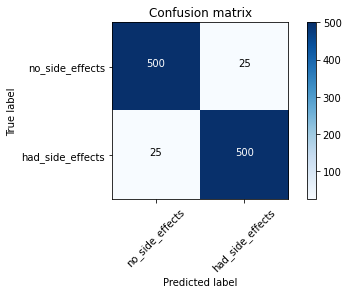

In [36]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

In [37]:
import os.path
if os.path.isfile('trial_model.h5') is False:
    model.save('trial_model.h5')
    print("Model Saved!")

Model Saved!


In [39]:
from tensorflow.keras.models import load_model
new_model = load_model('trial_model.h5')

In [40]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [41]:
new_model.get_weights()

[array([[-0.6464184 , -0.6314443 , -0.4937517 ,  0.39794135, -0.6464022 ,
          0.82048583, -0.5461463 , -0.26788673,  0.47927082,  0.09782773,
          0.52646613,  0.28462574]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.0268476 ,  0.        ,
        -0.12436428,  0.        ,  0.        , -0.16217782,  0.1866475 ,
        -0.19826376, -0.12816918], dtype=float32),
 array([[-1.39117420e-01, -2.67854065e-01, -1.00076377e-01,
         -3.43536109e-01,  2.92629659e-01,  2.51765430e-01,
         -3.65966618e-01, -2.61321485e-01, -3.82579595e-01,
          3.63287807e-01, -3.88373882e-01,  8.81500244e-02,
         -2.69805014e-01, -2.77388692e-01,  3.31559777e-03,
          5.08644879e-02, -8.69101882e-02, -1.94960445e-01,
         -4.36192751e-03, -5.20947874e-02,  3.49299550e-01,
          3.07099342e-01,  2.79424131e-01,  3.59661341e-01],
        [ 3.35463405e-01,  3.30983341e-01,  3.99017513e-01,
          3.85630786e-01, -4.78858948e-02, -3.45247805e-01,
 

In [42]:
new_model.optimizer

In [43]:
json_string = model.to_json()

In [44]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 12, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 24, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [45]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [46]:

model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [47]:

import os.path
if os.path.isfile('my_model_weights.h5') is False:
    model.save_weights('my_model_weights.h5')
    print("Model Saved!")

Model Saved!
